<a href="https://colab.research.google.com/github/Abhilaksh1498/SoC-20-Chatbot/blob/master/Fashion_MNIST_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np

In [0]:
# Seeing the actual name of dataset
tfds.list_builders()

In [3]:
fashion_mnist, info = tfds.load('fashion_mnist', with_info= True, as_supervised= True)

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.0.incompletePTRUBE/fashion_mnist-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.0.incompletePTRUBE/fashion_mnist-test.tfrecord


Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.0. Subsequent calls will reuse this data.


In [4]:
print(info)

tfds.core.DatasetInfo(
    name='fashion_mnist',
    version=3.0.0,
    description='Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.',
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author    = {Han Xiao and
                   Kashif Rasul and
                   Roland Vollgraf},
      title     = {Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning
                   Algorithms},
      journal   = {CoRR},
      volume

In [5]:
train_data = fashion_mnist['train']     # These are tf Dataset objects, as_supervised loads into tuples of (features, labels)
test_data = fashion_mnist['test']
print(type(train_data))

<class 'tensorflow.python.data.ops.dataset_ops.DatasetV1Adapter'>


In [6]:
# Accessing elements of datatset
for s,l in train_data.take(1):
  print(s.numpy().shape)  # (28, 28, 1)
  print(l.numpy())        # 2

s,l = next(tfds.as_numpy(train_data))     # Uses tfds.as_numpy to convert: tf.data.Dataset -> Generator[np.array]
print(s.shape)
print(l)


(28, 28, 1)
2
(28, 28, 1)
2


In [0]:
training_images = []
testing_images = []
training_labels = []
testing_labels = []

for s,l in tfds.as_numpy(train_data):
  training_images.append(s)
  training_labels.append(l)

for s,l in tfds.as_numpy(test_data):
  testing_images.append(s)
  testing_labels.append(l)

testing_images = np.array(testing_images)
training_images = np.array(training_images)
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

In [0]:
testing_images = testing_images[:,:,:,0]
training_images = training_images[:,:,:,0]

[[  0   0   0   0   0   1   0   0   0   0 107 211 208 225 223 200 195  43   0   0   0   0   1   0   0   0   0   0]
 [  0   0   0   4   3   0   0   0  95 208 222 255 178 100  79 173 209 234 164  53   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0 132 183 204 190 168 200 176 117 109 195 203 195 206 206 219 109   0   0   1   0   0   0]
 [  0   0   0   1   0 114 200 183 183 186 189 181 201 217 222 195 197 197 193 190 201 206 104   0   0   0   0   0]
 [  0   0   0   0   4 184 168 184 183 187 193 189 186 186 184 192 192 192 193 195 187 181 176   7   0   0   0   0]
 [  0   0   0   0  70 178 168 179 189 179 189 181 193 190 189 198 186 195 190 175 183 178 192  82   0   0   0   0]
 [  0   0   0   0 123 189 173 165 181 190 197 193 197 197 198 201 203 197 198 197 168 198 197 136   0   0   0   0]
 [  0   0   0   0 187 186 190 161 183 198 189 193 198 192 197 193 200 197 197 181 154 211 186 189   0   0   0   0]
 [  0   0   0   4 209 179 201 159 161 187 186 186 190 190 192 189 195 192 201 16

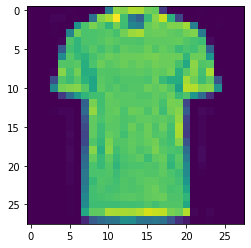

In [9]:
import matplotlib.pyplot as plt
np.set_printoptions(linewidth=200)
########### To plot an image it should be 2D, grayscale images have a third dimension as well so we need to rehsape as 2D array
print(testing_images[42])
plt.imshow(testing_images[42])

In [0]:
# We'll use a simple sequential model without any convolution with 1 hidden layer
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation= 'relu'))
model.add(tf.keras.layers.Dense(10, activation= 'softmax'))

In [0]:
# In case of images we need to Normalize data (for images values are btw 0 & 255)
testing_images = testing_images / 255.0
training_images = training_images / 255.0

In [36]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])

model.fit(training_images, training_labels, epochs=10, validation_split= .05)

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.




If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



1782/1782 [==============================] - 4s 2ms/step - loss: 0.5028 - sparse_categorical_accuracy: 0.8256 - val_loss: 0.3748 - val_sparse_categorical_accuracy: 0.8673
Epoch 2/10
1782/1782 [==============================] - 4s 2ms/step - loss: 0.3781 - sparse_categorical_accuracy: 0.8639 - val_loss: 0.3311 - val_sparse_categorical_accuracy: 0.8833
Epoch 3/10
1782/1782 [==============================] - 4s 2ms/step - loss: 0.3386 - sparse_categorical_accuracy: 0.8774 - val_loss: 0.3230 - val_sparse_categorical_accuracy: 0.8890
Epoch 4/10
1782/1782 [==============================] - 4s 2ms/step - loss: 0.3129 - sparse_categorical_accuracy: 0.8845 - val_loss: 0.2966 - val_sparse_categorical_accuracy: 0.8957
Epoch 5/10
1782/1782 [==============================] - 4s 2ms/step - loss: 0.2952 - sparse_categorical_accuracy: 0.8908 - val_loss: 0.3037 - val_sparse_categorical_accuracy: 0.8877
Epoch 6/10
1782/1782 [==============================] - 4s 2ms/step - loss: 0.2821 - sparse_categoric

In [37]:
y_pred = model.predict(testing_images)
print(f'Predicted Label {y_pred[0]}')
print(f'Actual Label {testing_labels[0]}')
print(y_pred[0].sum())     # 1 => For every image it predicts an array of prob 
print(np.argmax(y_pred[0]))

Predicted Label [2.1007334e-06 1.2495075e-06 8.1631970e-03 7.7079392e-05 9.3124855e-01 2.1504325e-09 6.0507264e-02 7.7929868e-10 4.5761067e-07 2.0892379e-09]
Actual Label 4
0.9999999
4


In [0]:
test = np.zeros((1,28,28))
test[0] = testing_images[0]
np.argmax(model.predict(test))

In [39]:
score = np.array(model.evaluate(testing_images, testing_labels))
print(score.shape)
print(score[0])
print(score[1])
print(model.metrics_names) # This gives the various elements of array returned by evaluate method

313/313 [==============================] - 0s 1ms/step - loss: 0.3312 - sparse_categorical_accuracy: 0.8845
(2,)
0.33120179176330566
0.8845000267028809
['loss', 'sparse_categorical_accuracy']


In [18]:
# We'll build a more sophisticated model with convolution layers
model_conv = tf.keras.models.Sequential([# you need to specify input_shape parameter for first conv2d layer
                                         tf.keras.layers.Conv2D(input_shape = (28,28,1), filters= 64, kernel_size= (3,3), activation= 'relu'),
                                         tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides= (2,2)),
                                         tf.keras.layers.Conv2D(filters= 32, kernel_size= (3,3), activation= 'relu'),
                                         tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides= (2,2)),
                                         tf.keras.layers.Flatten(),
                                         tf.keras.layers.Dense(16, activation= 'relu'),
                                         tf.keras.layers.Dense(10, activation= 'softmax')
])

model_conv.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        18464     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                12816     
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [0]:
model_conv.compile(optimizer= 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

############### Expanding a dimension of numpy array ############
# a = np.expand_dims(a, axis = -1)    convert (28,28) to (28,28,1)

# including a callback function to stop training when accuracy > 99%
class MyCustomCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if logs['accuracy'] > .92:
      print(f'Training stopped after epoch no {epoch}')
      val_acc = logs['val_accuracy']
      print(f'Validation accuracy is {val_acc}')
      self.model.stop_training = True

#     on_epoch_end: logs include `acc` and `loss`, and
#     optionally include `val_loss`
#     (if validation is enabled in `fit`), and `val_acc`
#     (if validation and accuracy monitoring are enabled)
mycallback = MyCustomCallback() 

In [53]:
r = model_conv.fit(training_images, training_labels, epochs =10, validation_split= .1, callbacks=[mycallback])

Epoch 1/10
1688/1688 [==============================] - 62s 37ms/step - loss: 0.2342 - accuracy: 0.9134 - val_loss: 0.2670 - val_accuracy: 0.9043
Epoch 2/10
1688/1688 [==============================] - 62s 37ms/step - loss: 0.2209 - accuracy: 0.9176 - val_loss: 0.2577 - val_accuracy: 0.9077
Epoch 3/10
1687/1688 [============================>.] - ETA: 0s - loss: 0.2130 - accuracy: 0.9228Training stopped after epoch no 2
Validation accuracy is 0.9108333587646484
1688/1688 [==============================] - 61s 36ms/step - loss: 0.2130 - accuracy: 0.9228 - val_loss: 0.2488 - val_accuracy: 0.9108


In [56]:
# checking performance on test set
score = np.array(model_conv.evaluate(testing_images, testing_labels))
print(score.shape)
print(score[0])
print(score[1])
print(model.metrics_names) # This gives the various elements of array returned by evaluate method

313/313 [==============================] - 3s 11ms/step - loss: 0.2835 - accuracy: 0.9017
(2,)
0.28347334265708923
0.9017000198364258
['loss', 'sparse_categorical_accuracy']
